In [2]:
import math
import numpy as np

import sympy
### similar to mathematica

from sympy import symbols, Symbol

sympy.init_printing(use_latex=True)

##### Dubins Auv Angle Solution

In [8]:
x, y = symbols('x, y', is_positive=True)
tan_theta = Symbol('tan_theta')

In [9]:
expr1 = sympy.Equality(x**2 + y**2, 1)
expr2 = sympy.Equality(y / (1.0 + x), tan_theta)

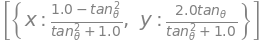

In [10]:
res = sympy.solve([expr1, expr2], [x, y], dict=True)
res

In [6]:
def compute_angel(theta):
    tan_theta_v = math.tan(theta)
    x = (1.0 - tan_theta_v ** 2) / (1.0 + tan_theta_v**2)
    y = 2.0 * tan_theta_v / (1.0 + tan_theta_v**2)
    return x, y

In [11]:
theta = np.deg2rad(-48.5)
x, y = compute_angel(theta)

r = np.rad2deg(math.atan2(y, 1.0 + x))
r

##### Flexiable Gradient Compution

##### Smoothess

In [3]:
x_t0, y_t0, z_t0 = symbols('x_t0, y_t0, z_t0', is_positive=True, is_real=True)
x_t1, y_t1, z_t1 = symbols('x_t1, y_t1, z_t1', is_positive=True, is_real=True)
x_t2, y_t2, z_t2 = symbols('x_t2, y_t2, z_t2', is_positive=True, is_real=True)

In [4]:
f = sympy.Pow(x_t1-x_t0, 2) + sympy.Pow(x_t2-x_t1, 2)
f

In [3]:
loss0 = sympy.Pow(x_t1-x_t0, 2) + sympy.Pow(y_t1-y_t0, 2) + sympy.Pow(z_t1-z_t0, 2)
loss1 = sympy.Pow(x_t2-x_t1, 2) + sympy.Pow(y_t2-y_t1, 2) + sympy.Pow(z_t2-z_t1, 2)
loss = loss0 + loss1

In [7]:
sympy.diff(loss, (x_t1, 1))

In [8]:
sympy.diff(loss, (y_t1, 1))

In [9]:
sympy.diff(loss, (z_t1, 1))

##### Conflict

In [2]:
x_1, y_1, z_1 = symbols('x_1, y_1, z_1', is_positive=True, is_real=True)
x_2, y_2, z_2 = symbols('x_2, y_2, z_2', is_positive=True, is_real=True)
length_max = Symbol('length_max', is_positive=True, is_real=True)

In [3]:
length = sympy.sqrt(sympy.Pow(x_1-x_2, 2) + sympy.Pow(y_1-y_2, 2) + sympy.Pow(z_1-z_2, 2))
loss = sympy.Pow(length - length_max, 2)

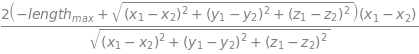

In [4]:
sympy.diff(loss, x_1)

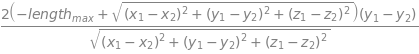

In [5]:
sympy.diff(loss, y_1)

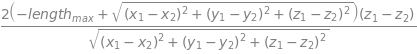

In [6]:
sympy.diff(loss, z_1)

##### Curvature

In [3]:
x_t0, y_t0, z_t0 = symbols('x_t0, y_t0, z_t0', is_positive=True, is_real=True)
x_t1, y_t1, z_t1 = symbols('x_t1, y_t1, z_t1', is_positive=True, is_real=True)
x_t2, y_t2, z_t2 = symbols('x_t2, y_t2, z_t2', is_positive=True, is_real=True)
curvature_max = Symbol('curvature_max', is_positive=True, is_real=True)

In [4]:
vecx_01 = x_t1 - x_t0
vecy_01 = y_t1 - y_t0
vecz_01 = z_t1 - z_t0

vecx_12 = x_t2 - x_t1
vecy_12 = y_t2 - y_t1
vecz_12 = z_t2 - z_t1

length_01 = sympy.sqrt(
    sympy.Pow(vecx_01, 2) + sympy.Pow(vecy_01, 2) + sympy.Pow(vecz_01, 2)
)
length_12 = sympy.sqrt(
    sympy.Pow(vecx_12, 2) + sympy.Pow(vecy_12, 2) + sympy.Pow(vecz_12, 2)
)

cos_theta = (vecx_01 * vecx_12 + vecy_01 * vecy_01 + vecz_01 * vecz_12) / (length_01 * length_12)
theta = sympy.acos(cos_theta)

loss = theta / length_12 - curvature_max

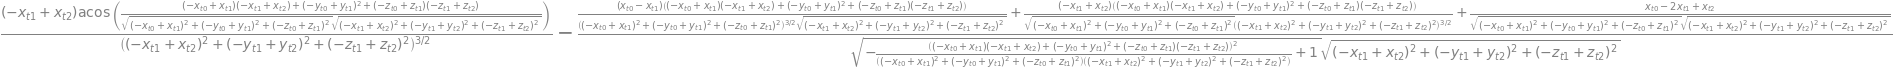

In [7]:
sympy.diff(loss, x_t1)